# ML using Deep Learning

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

### Load data & initiate parameters

In [2]:
import pandas as pd
X = pd.read_csv('./data/lda_doc2vec_feats.csv', index_col=False)
y = pd.read_csv('./data/lda_doc2vec_targs.csv', index_col=False)
X = X.drop(columns=['Unnamed: 0'])
y = y.drop(columns=['Unnamed: 0'])

In [3]:
X = X.fillna(0)

In [4]:
X.columns

Index(['title', 'abstract', 'journal', 'DOI', 'date', 'collection',
       'published', 'nauthors', 'topic.Healthcare', 'topic.Drug discovery',
       'topic.Epidemiology', 'topic.Clinics', 'topic.Chest X-Ray',
       'topic.Genomics', 'topic', 'numcit', 'influcit', 'DL_Pdf', 'DL_Full',
       'DL_Abstract', 'cit', 'cit_velocity', 'influential_cit', 'sum.npapers',
       'sum.infCit', 'mean.npapers', 'mean.infCit', 'max.npapers',
       'max.infCit', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', 'pubmed', 'medrxiv', 'arxiv', 'biorxiv'],
      dtype='object')

In [5]:
X.head()

,title,abstract,journal,DOI,date,collection,published,nauthors,topic.Healthcare,topic.Drug discovery,...,44,45,46,47,48,49,pubmed,medrxiv,arxiv,biorxiv
0,"Multivariate analysis of CT imaging, laborator...",PURPOSE: To develop and externally validate a ...,Abdom Radiol (NY),33098478,2020-10-25,pubmed,0,6,0.000988,0.000988,...,0.913219,0.504112,0.143168,0.799205,0.841659,-1.999502,True,False,False,False
1,Omics study reveals abnormal alterations of br...,Omics study reveals abnormal alterations of br...,Signal Transduct Target Ther,33097684,2020-10-25,pubmed,0,10,0.019710,0.366652,...,-0.397085,-0.263490,0.377143,-0.114580,0.397750,-1.023834,True,False,False,False
2,Identifying novel factors associated with COVI...,The COVID-19 virus has infected more than 38 m...,Sci Total Environ,33097268,2020-10-25,pubmed,0,12,0.001407,0.001408,...,1.183674,1.071069,0.682742,-0.921812,-0.810411,-3.866658,True,False,False,False
3,Utility of Proteomics in Emerging and Re-Emerg...,Emerging and re-emerging infectious diseases d...,J Proteome Res,33095583,2020-10-24,pubmed,0,11,0.075431,0.633524,...,-1.275409,0.269780,1.206353,-1.313658,0.536764,-1.474308,True,False,False,False
4,Potential therapeutic use of corticosteroids a...,"The outbreak of COVID-19, caused by severe acu...",J Biomol Struct Dyn,33094701,2020-10-24,pubmed,0,4,0.051436,0.942934,...,-0.092261,2.134663,-0.792632,0.165637,-1.676372,-1.797239,True,False,False,False


In [6]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Parameter tweaking for Deep Learning

In [9]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

def create_model(n_features, layers):
    # create model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(layers[0], input_dim=n_features, activation='relu'))
    
    # add hidden layers
    for l in range(1,len(layers)):
        model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
    return model

def DL_Modeling(features, layers, epochs):
    model = create_model(len(features),layers)
    md = model.fit(X_train[features],y_train, epochs=epochs, batch_size=64)
    pred = model.predict(X_test[features])
    
    fpr_dl, tpr_dl, _ = roc_curve(y_test, pred)
    
    return fpr_dl, tpr_dl

In [10]:
F_Doc2Vec = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49']

In [11]:
len(F_Doc2Vec)

50

## 2 layers

In [121]:
import numpy as np

layer1 = [10, 20, 30, 40, 50 , 60, 70, 80, 90, 100, 120, 130]
layer2 = [10, 20, 30, 40, 50 , 60, 70]

aucs2 = np.zeros((len(layer1), len(layer2)))

for i2 in range(len(layer2)):
    for i1 in range(len(layer1)):
        fpr_dl, tpr_dl = DL_Modeling(F_Doc2Vec,[layer1[i1],layer2[i2]], 1)
        aucs2[i1, i2] = auc(fpr_dl, tpr_dl)

4548/4548 [==============================] - 6s 1ms/sample - loss: 0.6235 - acc: 0.6539


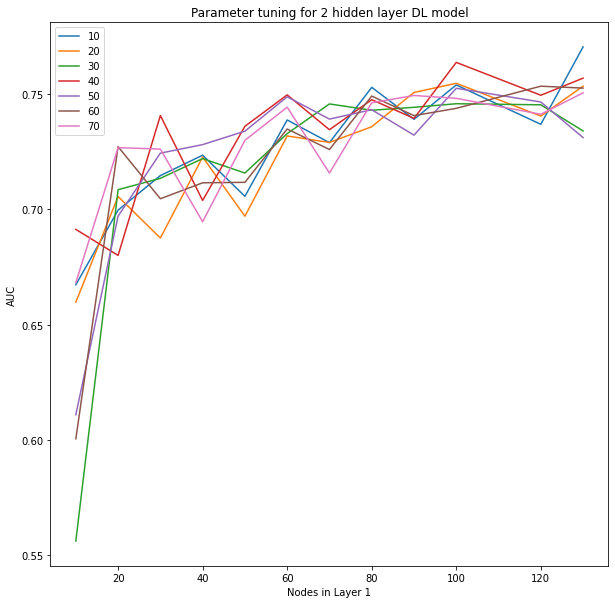

<Figure size 720x720 with 0 Axes>

In [122]:
import matplotlib.pyplot as plt

layer1 = [10, 20, 30, 40, 50 , 60, 70, 80, 90, 100, 120, 130]
layer2 = [10, 20, 30, 40, 50 , 60, 70]

plt.figure()
plt.rcParams['figure.figsize'] = [10, 10]

for i2 in range(len(layer2)):
    plt.plot(layer1, aucs2[:,i2], label=str(layer2[i2]))

plt.xlabel('Nodes in Layer 1')
plt.ylabel('AUC')
plt.title('Parameter tuning for 2 hidden layer DL model')
plt.legend(loc='best')
fig1 = plt.gcf()

plt.show()
plt.draw()
#fig1.savefig('2_hidden_layer_DL.png', dpi=100)

In [145]:
import numpy as np

layer1 = [10, 20, 30, 40, 50 , 60, 70, 80, 90, 100, 120, 130]
layer2 = [10, 20, 30, 40, 50 , 60, 70]

file1 = open("2layer_aucs.csv","w") 

file1.write("layer1\tlayer2\tauc\n")
for i2 in range(len(layer2)):
    for i1 in range(len(layer1)):
        file1.write(str(layer1[i1]) + "\t" +  str(layer2[i2]) + "\t" +  str(aucs2[i1, i2]) + "\n")
file1.close() 

## 3 layers

In [124]:
import numpy as np

layer1 = [10, 20, 30, 40, 50 , 60, 70, 80, 90, 100, 110, 120, 130, 140]
layer2 = [10, 20, 30, 40, 50 , 60, 70]
layer3 = [10, 20, 30]

aucs3 = np.zeros((len(layer1), len(layer2), len(layer3)))
for i3 in range(len(layer3)):
    for i2 in range(len(layer2)):
        for i1 in range(len(layer1)):
            fpr_dl, tpr_dl = DL_Modeling(F_Doc2Vec,[layer1[i1],layer2[i2],layer3[i3]], 1)
            aucs3[i1, i2, i3] = auc(fpr_dl, tpr_dl)

4548/4548 [==============================] - 11s 2ms/sample - loss: 0.6232 - acc: 0.6500


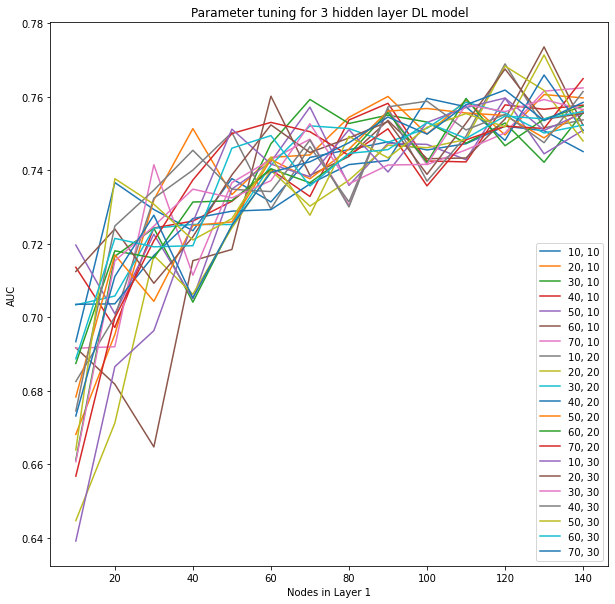

<Figure size 720x720 with 0 Axes>

In [125]:
import matplotlib.pyplot as plt

plt.figure()
plt.rcParams['figure.figsize'] = [10, 10]

for i3 in range(len(layer3)):
    for i2 in range(len(layer2)):
        plt.plot(layer1, aucs3[:,i2, i3], label=str(layer2[i2]) + ', ' + str(layer3[i3]))

plt.xlabel('Nodes in Layer 1')
plt.ylabel('AUC')
plt.title('Parameter tuning for 3 hidden layer DL model')
plt.legend(loc='best')
fig1 = plt.gcf()

plt.show()
plt.draw()
#fig1.savefig('3_hidden_layer_DL.png', dpi=100)

In [146]:
import numpy as np

layer1 = [10, 20, 30, 40, 50 , 60, 70, 80, 90, 100, 110, 120, 130, 140]
layer2 = [10, 20, 30, 40, 50 , 60, 70]
layer3 = [10, 20, 30]
            
file1 = open("3layer_aucs.csv","w") 

file1.write("layer1\tlayer2\tlayer3\tauc\n")
for i3 in range(len(layer3)):
    for i2 in range(len(layer2)):
        for i1 in range(len(layer1)):
            file1.write(str(layer1[i1]) + "\t" +  str(layer2[i2]) + "\t" +  str(layer3[i3]) + "\t" +  str(aucs3[i1, i2, i3]) + "\n")
file1.close() 

## 4 layers

In [127]:
import numpy as np

layer1 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
layer2 = [10, 20, 30, 40, 50, 60, 70, 80]
layer3 = [10, 20, 30, 40, 50]
layer4 = [10, 20]

aucs4 = np.zeros((len(layer1), len(layer2), len(layer3), len(layer4)))
for i4 in range(len(layer4)):
    for i3 in range(len(layer3)):
        for i2 in range(len(layer2)):
            for i1 in range(len(layer1)):
                fpr_dl, tpr_dl = DL_Modeling(F_Doc2Vec,[layer1[i1],layer2[i2],layer3[i3],layer4[i4]], 1)
                aucs4[i1, i2, i3, i4] = auc(fpr_dl, tpr_dl)

4548/4548 [==============================] - 156s 34ms/sample - loss: 0.6100 - acc: 0.6649


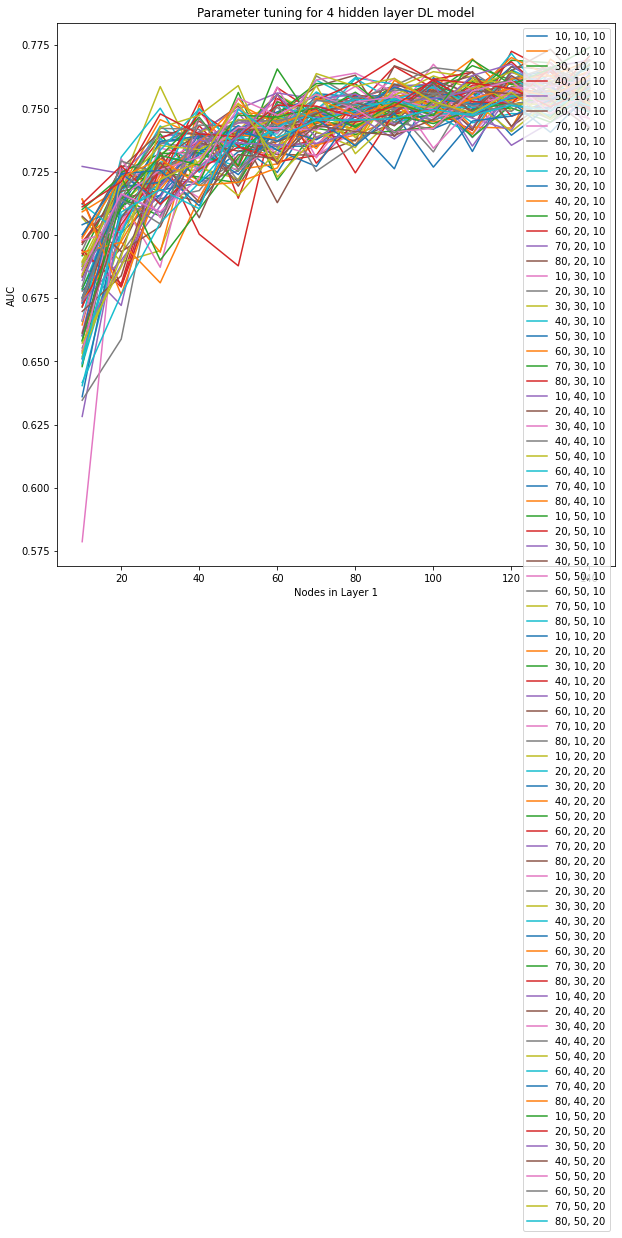

<Figure size 720x720 with 0 Axes>

In [128]:
import matplotlib.pyplot as plt

plt.figure()
plt.rcParams['figure.figsize'] = [10, 10]
for i4 in range(len(layer4)):
    for i3 in range(len(layer3)):
        for i2 in range(len(layer2)):
            plt.plot(layer1, aucs4[:,i2, i3, i4], label=str(layer2[i2]) + ', ' + str(layer3[i3]) + ', ' + str(layer4[i4]))

plt.xlabel('Nodes in Layer 1')
plt.ylabel('AUC')
plt.title('Parameter tuning for 4 hidden layer DL model')
plt.legend(loc='upper right')
fig1 = plt.gcf()

plt.show()
plt.draw()
#fig1.savefig('4_hidden_layer_DL.png', dpi=100)

# Best performance given by (140	10	50	20)
# Alternative choice with fewer num of nodes (30	10	20	10)

In [147]:
import numpy as np

layer1 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
layer2 = [10, 20, 30, 40, 50, 60, 70, 80]
layer3 = [10, 20, 30, 40, 50]
layer4 = [10, 20]
            
file1 = open("4layer_aucs.csv","w") 

file1.write("layer1\tlayer2\tlayer3\tlayer4\tauc\n")
for i4 in range(len(layer4)):
    for i3 in range(len(layer3)):
        for i2 in range(len(layer2)):
            for i1 in range(len(layer1)):
                file1.write(str(layer1[i1]) + "\t" +  str(layer2[i2]) + "\t" +  str(layer3[i3]) + "\t" +  str(layer4[i4]) + "\t" +  str(aucs4[i1, i2, i3, i4]) + "\n")
file1.close() 

# Final comparison

In [13]:
# Best performance given by (140	10	50	20) 0.774007048
# Alternative choice with fewer num of nodes (30	10	20	10) 0.758567745
# Best performance with 3 layers (130	60	10) 0.773605109
def create_model():
    # create model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(140, input_dim=50, activation='relu'))
    model.add(tf.keras.layers.Dense(10, input_dim=50, activation='relu'))
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.Dense(20, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
    return model

In [14]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

estimator = KerasClassifier(build_fn=create_model, epochs=20, batch_size=64, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
accs = cross_val_score(estimator, X[F_Doc2Vec], y, cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (accs.mean()*100, accs.std()*100))

Baseline: 65.51% (2.94%)


In [16]:
def create_model():
    # create model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(140, input_dim=50, activation='relu'))
    model.add(tf.keras.layers.Dense(10, input_dim=50, activation='relu'))
    model.add(tf.keras.layers.Dense(50, activation='relu'))
    model.add(tf.keras.layers.Dense(20, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
    return model

In [18]:
model = create_model()
md = model.fit(X_train[F_Doc2Vec], y_train, epochs=10, batch_size=64)

Epoch 1/10
72/72 [==============================] - 1s 2ms/step - loss: 0.6743 - accuracy: 0.5681
Epoch 2/10
72/72 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7013
Epoch 3/10
72/72 [==============================] - 0s 2ms/step - loss: 0.5411 - accuracy: 0.7202
Epoch 4/10
72/72 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.7329
Epoch 5/10
72/72 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.7436
Epoch 6/10
72/72 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7497
Epoch 7/10
72/72 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.7760
Epoch 8/10
72/72 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.8037
Epoch 9/10
72/72 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8171
Epoch 10/10
72/72 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8260


Text(0, 0.5, 'Accuracy')

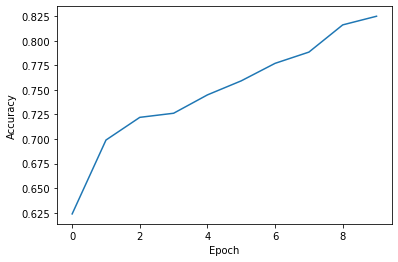

In [20]:
plt.plot(md.epoch, md.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [21]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test[F_Doc2Vec], y_test, batch_size=64)
print("test loss, test acc:", results)

Evaluate on test data
18/18 [==============================] - 0s 3ms/step - loss: 0.6461 - accuracy: 0.6661
test loss, test acc: [0.64613938331604, 0.6660808324813843]


In [25]:
pred = model.predict(X_test[F_Doc2Vec])

In [23]:
from sklearn.metrics import roc_curve, auc

fpr_dl, tpr_dl, _ = roc_curve(y_test, pred)
print("AUC is :" + str(auc(fpr_dl, tpr_dl)))

AUC is :0.744614009363585


In [27]:
X['pub_prob'] = model.predict(X[F_Doc2Vec])

# Analyze the distrubution among Topics

<AxesSubplot:xlabel='topic'>

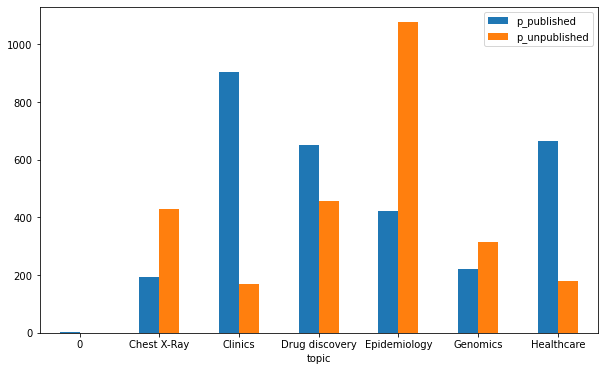

In [37]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

X['p_published'] = (X['pub_prob'] > 0.5) * 1
df_ret = pd.merge(X['topic'], X['p_published'], left_index=True, right_index=True)

topic_sum = df_ret.groupby('topic').agg({'topic':'count', 'p_published':'sum'})
topic_sum['p_unpublished'] = topic_sum['topic'] - topic_sum['p_published']
topic_sum[['p_published', 'p_unpublished']].plot.bar(rot=0)

<AxesSubplot:xlabel='topic'>

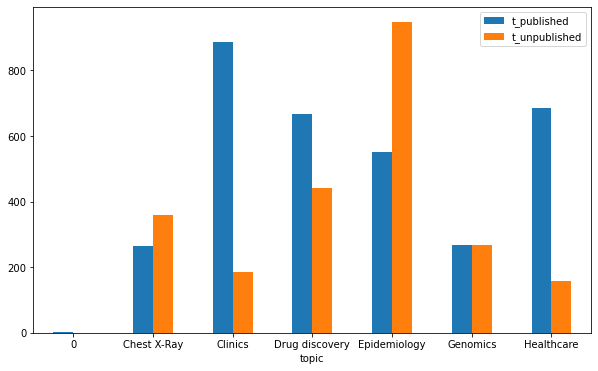

In [38]:
X['t_published'] = y * 1
df_t_ret = pd.merge(X['topic'], X['t_published'], left_index=True, right_index=True)

topic_t_sum = df_t_ret.groupby('topic').agg({'topic':'count', 't_published':'sum'})
topic_t_sum['t_unpublished'] = topic_t_sum['topic'] - topic_t_sum['t_published']
topic_t_sum[['t_published', 't_unpublished']].plot.bar(rot=0)